# Regularization Analysis

This experiment will compare 4 sets of EEG channels selections:
* C3, C4
* C5, C3, C1, C2, C4, C6, FC3, CP3, FC4, CP4
* FC5, FC3, FC2, C5, C3, C1, CP5, CP3, CP1, FC2, FC4, FC6, C2, C4, C6, CP2, CP4, CP6
* All EEG channels

In [1]:
bare_minimum_channels = ['C3', 'C4']
minimum_channels = ['C5', 'C3', 'C1', 'C2', 'C4', 'C6', 'FC3', 'CP3', 'FC4', 'CP4']

all_available_channels = ['FC5', 'FC3', 'FC2', 'C5', 'C3', 'C1', 'CP5', 'CP3', 'CP1', 'FC2', 'FC4', 'FC6', 'C2', 'C4',
                          'C6', 'CP2', 'CP4', 'CP6']

For 4 frequency bands:
* 8Hz-10Hz
* 10Hz-12Hz
* 20Hz-22Hz
* 22Hz-24Hz

In [2]:
bands = [(6, 8), (8, 10), (20, 22), (22, 24)]

All done for 1 subject:

In [3]:
subject_name = 's14'

## Load libraries

In [8]:
import mne
from experiments.band_classification import process_bands
from visualization.time_dependent_accuracy import visualize_multiple_configurations_band_accuracy
from visualization.csp_filters import visualize_csp_filters
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Hide all debug logs from mne
mne.set_log_level('ERROR')

# Increase plot size
plt.rcParams['figure.figsize'] = [16, 8]

Path("cached_data").mkdir(parents=True, exist_ok=True)

## Process Data

In [10]:
experiment_names = ['reg: None', 'reg: .01', 'reg: .05', 'reg: .09']

try:
    experiment_channel_selections = np.load('cached_data/reagularizations.npy', allow_pickle=True)
except FileNotFoundError:
    experiment_channel_selections = [
        process_bands(subject_name, bands, all_available_channels),
        process_bands(subject_name, bands, all_available_channels, 0.01),
        process_bands(subject_name, bands, all_available_channels, 0.05),
        process_bands(subject_name, bands, all_available_channels, 0.09)
    ]
    nd_experiment_channel_selections = np.asarray(experiment_channel_selections, dtype='object')
    np.save('cached_data/reagularization', nd_experiment_channel_selections)

Processing 6 Hz - 8 Hz band
Processing 8 Hz - 10 Hz band
Processing 20 Hz - 22 Hz band
Processing 22 Hz - 24 Hz band
Processing 6 Hz - 8 Hz band
Processing 8 Hz - 10 Hz band
Processing 20 Hz - 22 Hz band
Processing 22 Hz - 24 Hz band
Processing 6 Hz - 8 Hz band
Processing 8 Hz - 10 Hz band
Processing 20 Hz - 22 Hz band
Processing 22 Hz - 24 Hz band
Processing 6 Hz - 8 Hz band
Processing 8 Hz - 10 Hz band
Processing 20 Hz - 22 Hz band
Processing 22 Hz - 24 Hz band


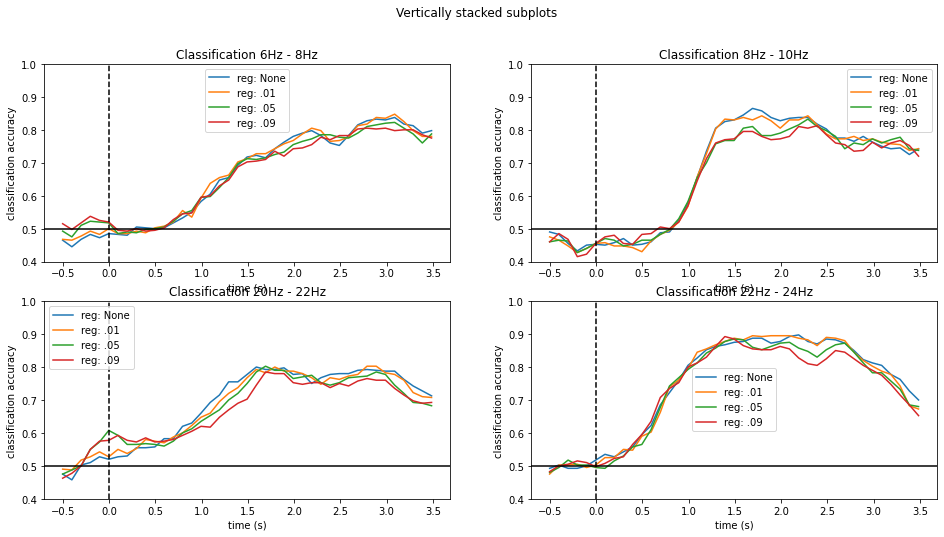

In [11]:
visualize_multiple_configurations_band_accuracy(bands, experiment_channel_selections, experiment_names, (2, 2))

6Hz - 8Hz


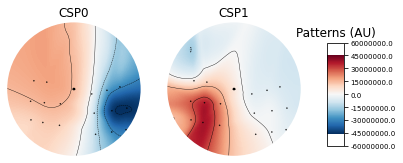

8Hz - 10Hz


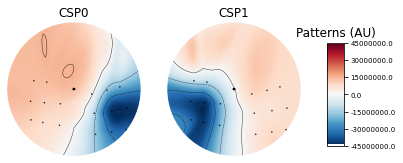

20Hz - 22Hz


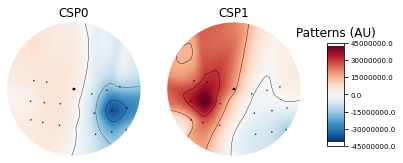

22Hz - 24Hz


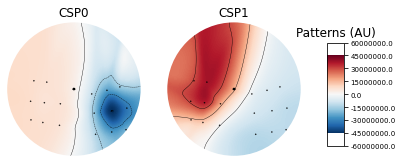

6Hz - 8Hz


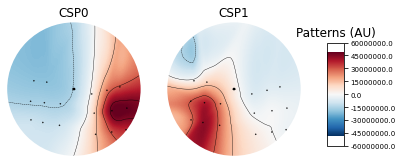

8Hz - 10Hz


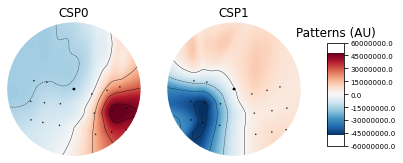

20Hz - 22Hz


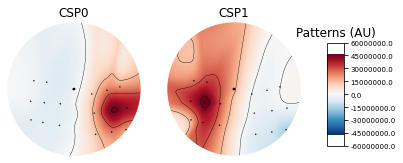

22Hz - 24Hz


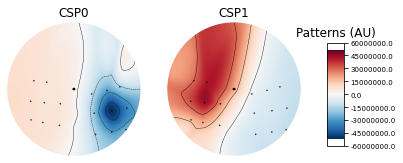

6Hz - 8Hz


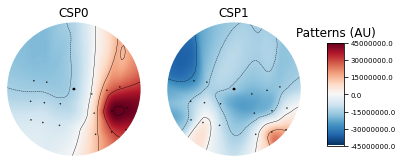

8Hz - 10Hz


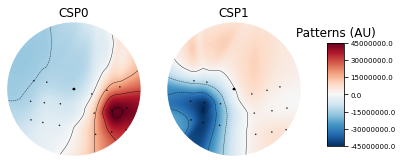

20Hz - 22Hz


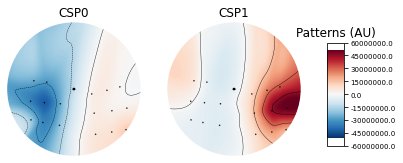

22Hz - 24Hz


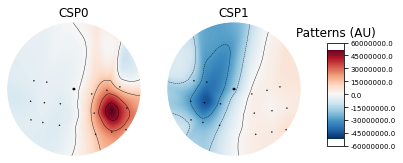

6Hz - 8Hz


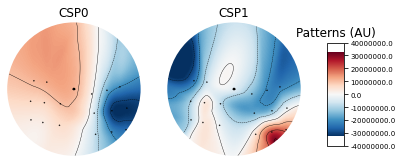

8Hz - 10Hz


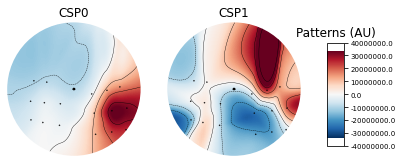

20Hz - 22Hz


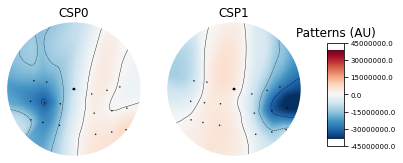

22Hz - 24Hz


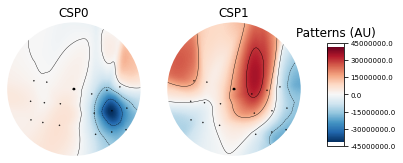

In [7]:
for index, experiment_name in enumerate(experiment_names):
    visualize_csp_filters(bands, experiment_channel_selections[index], 2)